In [1]:
from datetime import datetime, timedelta
import json
import pytz

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
# pd.set_option('max_columns', 50)

mpl.style.use('ggplot')

%matplotlib inline

In [2]:
X_LENGTH = 1801

In [3]:
import glob
import os

list_of_files = glob.glob("data/*") # * means all if need specific format then *.csv
latest_file = max(list_of_files, key=os.path.getctime)
print(latest_file)

with open(latest_file) as f:
    d = f.read()

d = [float(d) for d in d.split()]

data/2023-12-09_14:35:49.csv


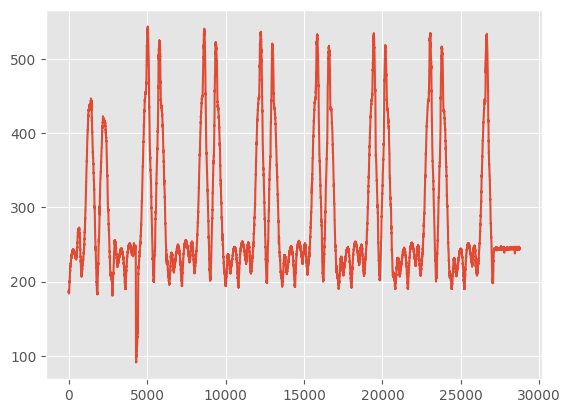

In [4]:
plt.plot(np.array(d))

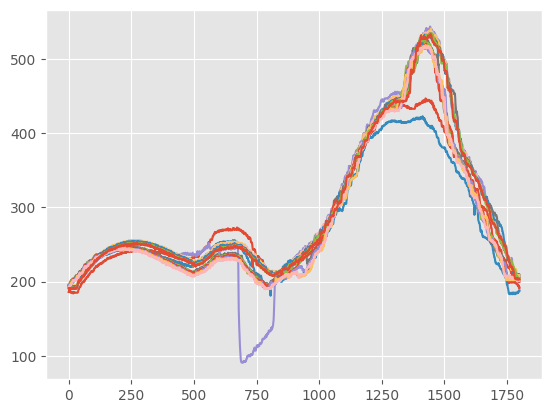

In [5]:
for i in range(int(len(d) / X_LENGTH)):
    start = i * X_LENGTH
    end = (i + 1) * X_LENGTH
    line = d[start:end]
    if i % 2 == 1:
        # line = [70] * 750 + list(reversed(line))[250:1250]
        # print(line[250:])
        line = list(reversed(line))
    plt.plot(line)

In [6]:
def build_img_array(data, x=X_LENGTH, reverse=True):
    """Build array suitable for plotting.

    Args:
        data: data array to munge.
        x (default: X_LENGTH): length of x dimension
        reverse: if True, assume scanner went back & forth.

    Returns:
        image array suitable for passing to matplotlib, etc.
    """
    y = int(len(d) / x)
    print(f"Looks like we have {x=}, {y=}")
    n = np.empty((y, x))
    for i in range(y):
        start = i * x
        end = (i + 1) * x
        line = d[start:end]
        if i % 2 == 1 and reverse is True:
            # print("Reversi!")
            line = list(reversed(line))
            # line = [70] * 750 + list(reversed(line))[250:1300]
            
        # print(f"Setting row {i}...")
        n[i] = line

    return n

In [13]:
def plot_pic(d, rot_90=0, scale_img_range=False, square=True):
    """Plot array d

    rot_90: how many 90 degree rotations (np.rot90) to apply to d.
    scale_img_range: if True, scale image range to (0, 1023). 
    Note: probably not needed, as this should be done automagically with 
    the colormap.
    square: if True, make the x and y aspect equal
    """
    # plt.pcolor(np.arange(-0.5, dim), np.arange(-0.5, dim), grid_np, cmap=ListedColormap(['crimson', 'turquoise']))
    # plt.pcolor(n, cmap=ListedColormap(["black", "white"]))
    img = build_img_array(d, reverse=True)
    if scale_img_range:
        img = scale(img)
        
    for i in range(rot_90):
        img = np.rot90(img)
    
    plt.pcolormesh(img, cmap="grey")
    if square:
        plt.gca().set_aspect('equal')  # show square as square
    # plt.xticks(range(x))
    # plt.yticks(range(y))
    plt.show()

In [14]:
def scale(d, min=0, max=1023):
    """Scale list d to min-max range."""
    print(f"Before: {np.max(d)=}, {np.min(d)=}")
    offset = np.min(d)
    orig_range = np.max(d) - np.min(d)
    scale_factor = (max - min) / orig_range
    d *= scale_factor 
    d -= offset
    print(f"After: {np.max(d)=}, {np.min(d)=}")
    return d

Looks like we have x=1801, y=15


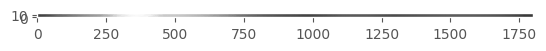

In [15]:
plot_pic(d, rot_90=2)

Looks like we have x=1801, y=15
Before: np.max(d)=544.0, np.min(d)=91.0
After: np.max(d)=1137.5033112582782, np.min(d)=114.50331125827816


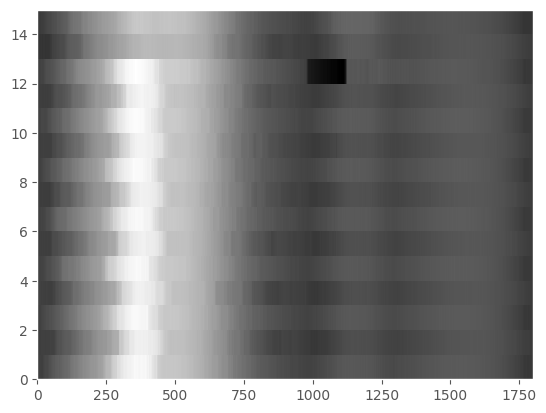

In [16]:
plot_pic(d, rot_90=2, scale_img_range=True, square=False)